In [57]:
# Dependencies
%matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Scope: 2.	Es “éxito” el que tu video aparezca más días como trending?


In [58]:
# Read original dataset. Date range varies from Nov 2017 up to June 2018
us_csv = "Resources/large_USvideos.csv"

original_df = pd.read_csv(us_csv)
original_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [59]:
# Rename column name 
df= original_df.rename(columns={"video_id": "id"})

#                                        "trending_date": "Trending Date",
#                                        "title": "Title",
#                                        "channel_title": "Channel",
#                                        "category_id": "Category",
#                                        "publish_time": "Publish Date",
#                                        "tags": "Tags",
#                                        "views": "Views",
#                                        "likes": "Likes",
#                                        "dislikes": "Dislikes",
#                                        "comment_count": "Comments"})

df.columns

Index(['id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

## Cleaning Data 

In [60]:
# Convert column Title to propper case  
df["title"] = df.title.str.capitalize()

# Deleting columns with no info 
del df['ratings_disabled']
del df['comments_disabled']
del df['video_error_or_removed']


In [61]:
df.head()

,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...


In [62]:
df["id"].count()

40949

In [63]:
# Count how many days each video was trending 
video_by_id = df.set_index("id").groupby(["id"])
video_trending_count = video_by_id.count()["title"]

video_trending_count.sort_values(ascending=False)

id
j4KvrAUjn6c    30
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
iILJvqrAQ_w    29
8h--kFui1JA    29
MAjY8mCTXWk    29
r-3iathMo7o    29
NBSAQenU2Bk    29
WIV3xNz8NoM    28
6S9c5nnDd_s    28
YI3tsmFsrOg    28
vjSohj-Iclc    28
ulNswX3If6U    28
UfKmSfgFxi8    28
2PH7dK6SLC8    28
mdWcaWBxxcY    28
6SuMbFuKDf8    27
BspHjvU11y4    27
-kTWIm7m4Uw    27
H7gh2fmdjCU    27
um-1fAVU1OQ    27
TjXQzRWmb_I    27
Xpv-sEKl1B4    27
nRc0kmOYgzQ    27
1purAy2MsOc    27
0zZ0Y_UZRBw    27
pFc6I0rgmgY    27
ju_inUnrLc4    26
ooyjaVdt-jA    26
D6Oy4LfoqsU    26
               ..
4qSziR6sD8Q     1
uEhv-4Eb9ms     1
J_fFW78fc7s     1
JBw1nwYJESc     1
ilTHiqAmuX8     1
IJKjMIU55pE     1
thIRJLsnIxY     1
tclPO3kOlfM     1
IJlXXvSFyUU     1
IKuKZIISPE0     1
jQF5Q3773uk     1
IOuFE-6Awos     1
5Smb3tZD1Qc     1
5SkwvwSydmk     1
5RjEaUqucbw     1
IXJhN4cOVM0     1
jGyUVyp9w9g     1
jE2VvGZktJo     1
J-NEOU-Ujeg     1
IbmvDn6I6sI     1
IfYRzxeMdGs     1
j28Gt5_Mlo8     1
5HUCAF6898w     1
5HOijUtExiM     1
IlkBLwl

In [64]:
#top100_trending_videos = video_trending_count.loc[video_trending_count["id"]]
# school_passing_math = merge_df.loc[merge_df["Math Score"]>= 70,:].groupby(["School Name"]).count()



### 3. Top 100 channels with more trending videos

In [65]:
#3.	Es éxito el que tu canal tenga más videos trending? (Brach: trending_channels) CM
#3.1. Lista de los 100 Canales de los videos que estuvieron mas dias trending. 
#3.2. Canal con mas videos trending

#•	Filtrar por Canal – videos únicos - contar cuantas veces estuvo trending.
#•	Para tener una lista de 100 canales con el mayor número de videos trending: (terminar pseudo)
#•	Teniendo nuestro listado de canales con mayor número de videos trending, veremos tendencias entre ellos como: Categorías y tags, generals y por mes.


In [66]:
#•	Filtrar por Canal – videos únicos - contar cuantas veces estuvo trending 
#3.1. Canal con el video que estuvo mas dias trending

import numpy as np

channels_df= df.groupby(['channel_title', 'id']).count()
channels_df= channels_df[["trending_date"]].sort_values(by="trending_date", ascending=False)
#adding the index
channels_df.reset_index(inplace=True)
channels_df.head()


,channel_title,id,trending_date
0,Lucas and Marcus,j4KvrAUjn6c,30
1,grav3yardgirl,QBL8IRJ5yHU,29
2,Charlie Puth,iILJvqrAQ_w,29
3,SamSmithWorldVEVO,8h--kFui1JA,29
4,杰威爾音樂 JVR Music,MAjY8mCTXWk,29


In [67]:
# crear lista de los 20 primeros canales unicos de los videos que estuvieron mas dias trending

trending_videos_per_channel= pd.DataFrame(df.groupby("channel_title").id.nunique().sort_values(ascending=False))
trending_videos_per_channel=trending_videos_per_channel[:20]
trending_videos_per_channel.reset_index(inplace=True)
trending_videos_per_channel

,channel_title,id
0,ESPN,84
1,TheEllenShow,74
2,The Tonight Show Starring Jimmy Fallon,72
3,Jimmy Kimmel Live,70
4,The Late Show with Stephen Colbert,58
5,Netflix,58
6,NBA,55
7,CNN,52
8,Vox,47
9,The Late Late Show with James Corden,46


In [68]:
###### Plot of the 20 channels with more trending videos.##### PODEMOS NOTAR QUE EL CANAL CON MAS VIDEOS TRENDING ES ESPN.

In [94]:
# set x, y axis and tick locations:

x_axis= trending_videos_per_channel["channel_title"]
y_axis= trending_videos_per_channel["id"]
tick_locations = [value for value in x_axis]

<IPython.core.display.Javascript object>


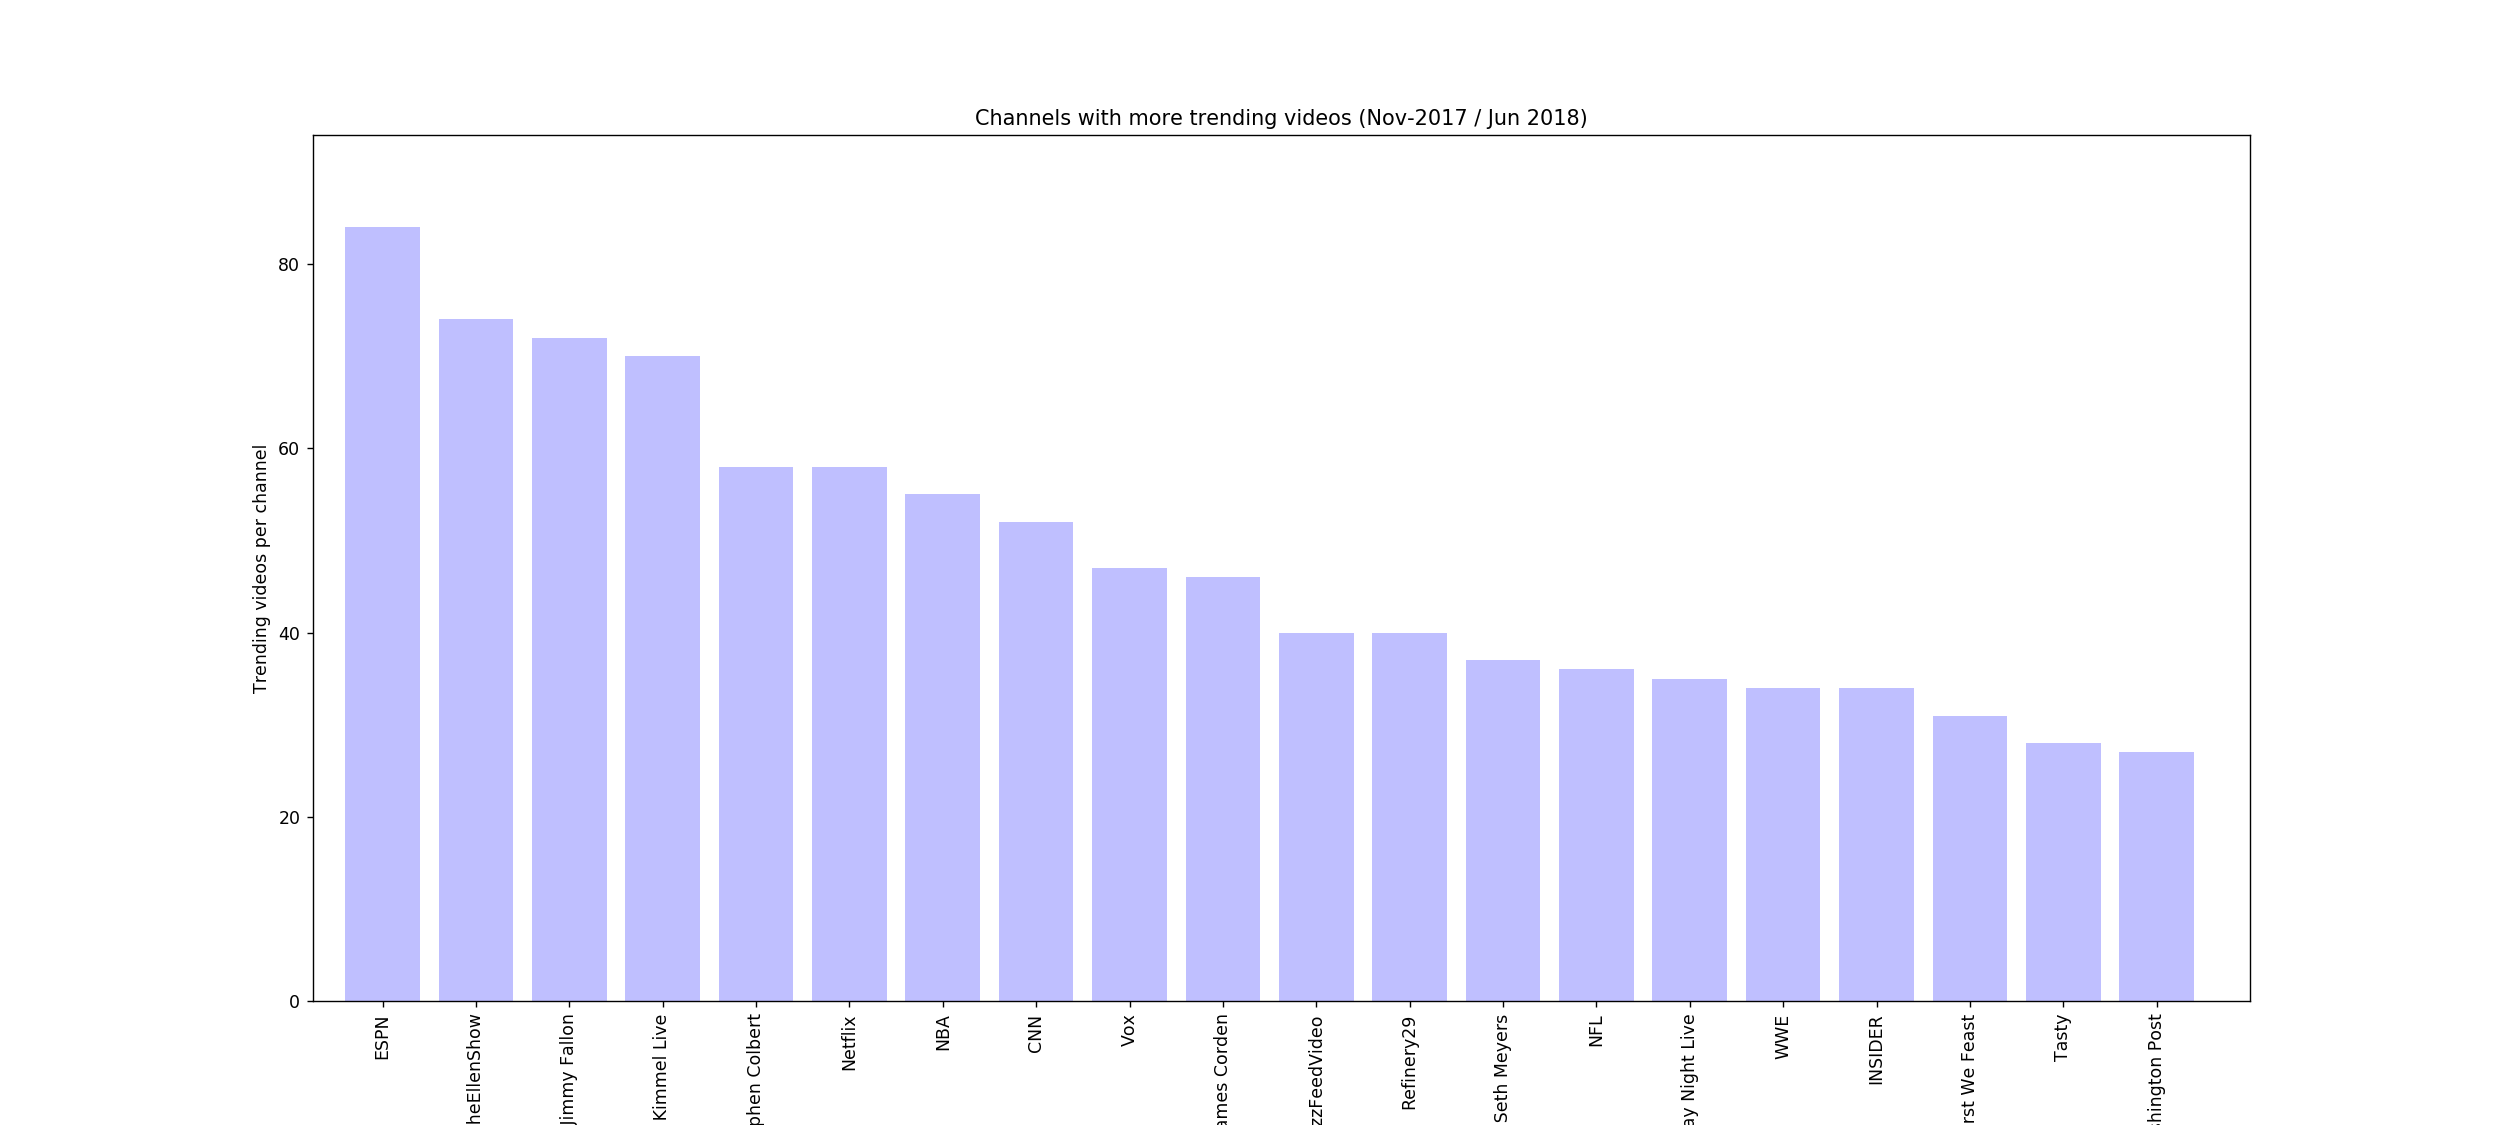

In [95]:
plt.figure(figsize=(20,9))
# Create a bar chart based upon the above data
top_channel_plot= plt.bar(x_axis, y_axis, color="b", alpha=0.25, align="center") 
plt.xticks(tick_locations,trending_videos_per_channel["channel_title"], rotation="vertical")
plt.show()


In [96]:
# set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0,max(trending_videos_per_channel["id"])+10)

(0, 94)

In [97]:
# Set a Title and labels
plt.title("Channels with more trending videos (Nov-2017 / Jun 2018)")
plt.xlabel("Youtube Channel")
plt.ylabel("Trending videos per channel")



Text(271.27777777777777, 0.5, 'Trending videos per channel')

### Hacer el mismo plot pero con la relacion por mes?????#######

### 3.2. Canal con mas videos trending

In [98]:

# Create a new list with the top 100 channels with more videos trending
#3.2. Canal con mas videos trending.(hacer lista de los 100 primeros)
# channels_in_order= channels_df.groupby("channel_title").agg({"trending_date": pd.Series.nunique})
# channels_in_order.sort_values(by="trending_date", ascending=False)
# Create a DF with the 100 channels and each video infos

### 3.3 Interactions

In [99]:
# Relacion Likes and interactions

relation_likes = df["likes"]/ (df["likes"]+df["dislikes"])

# Relacion dislikes and interactions

relation_dislikes = df["dislikes"]/ (df["likes"]+df["dislikes"])

# Nivel de aprobacion
approve_level = df["likes"]/ (df["views"])

# Nivel de rechazo

rejection_level = df["dislikes"]/ (df["views"])

# Relacion comentarios y views

comment_level = df["comment_count"]/ (df["views"])

# indicador de reaccion basado en likes y dislikes. 

reaction_indicator = (df["likes"] + df["dislikes"])/ df["views"]


# una persona puede ver varias veces el video y una sola vez marcar like o dislike, 
# ademas una persona puede agregar el numero de comentarios que desee.
# dado que no tenemos forma de saber cuantas veces una persona vio un video o si dio like y comentario, o numero de comentario
# un indicador global de reaccion es:

reaction_global_indicator = (df["likes"] + df["dislikes"]+ df["comment_count"])/ df["views"]

# agregar indicadores a la data frame

df["relation_likes"] = relation_likes
df["relation_dislikes"] = relation_dislikes
approve_level = df["likes"]/ (df["views"])
df["approve_level"] = approve_level
df["rejection_level"] = rejection_level
df["comment_level"] = comment_level
df["reaction_indicator"] = reaction_indicator
df["reaction_global_indicator"] = reaction_global_indicator

df.head()






,id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,relation_likes,relation_dislikes,approve_level,rejection_level,comment_level,reaction_indicator,reaction_global_indicator
0,2kyS6SvSYSE,17.14.11,We want to talk about our marriage,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.950970,0.049030,0.076869,0.003963,0.021318,0.080833,0.102151
1,1ZAPwfrtAFY,17.14.11,The trump presidency: last week tonight with j...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John...",0.940521,0.059479,0.040179,0.002541,0.005252,0.042720,0.047972
2,5qpjK5DgCt4,17.14.11,"Racist superman | rudy mancuso, king bach & le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.964729,0.035271,0.045758,0.001673,0.002563,0.047431,0.049994
3,puqaWrEC7tY,17.14.11,Nickelback lyrics: real or fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Today we find out if Link is a Nickelback amat...,0.938550,0.061450,0.029641,0.001941,0.006253,0.031582,0.037836
4,d380meD0W0M,17.14.11,I dare you: going bald!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...,0.985181,0.014819,0.063097,0.000949,0.008359,0.064046,0.072405


In [108]:
# Plots de los indicadores:

# plt.scatter(df_top_ch["relation_likes"], df_top_ch["comment_level"], marker="o", facecolors="red")
# plt.ylim(-0.75,10)
# plt.xlim(-0.75,10)
# plt.show()

In [ ]:
# Inventemos un poco <----- borrar pensamientos.

# -	HIPOTESIS: lo controversial de un video es proporsional a su exito(independientemente de de su categoria) 
# ANALISIS: indicador de controversialidad comment/views; dislikes/views; dislikes/(likes+dislikes); 
# (considerer multiplicar todos los anteriores como indicador global) VS indicador de exito viewstotal; #dias en trending.


